In [99]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler=MinMaxScaler()
df=pd.read_csv("daily")

In [100]:
# FUNCTIONS

def categorise(x):
    return x.astype("category")

In [101]:
clean_df=df.copy(deep=True)
x=["month", "weekday", "workingday", "weather", "clean_df", 
        "cnt", "hum", "windspeed", "temp", "season", "holiday"]
a=clean_df.columns
a=[i for i in a if i not in x]
clean_df.drop(a, axis=1, inplace=True)
clean_df["month"]=categorise(clean_df["month"])
clean_df["weekday"]=categorise(clean_df["weekday"])
clean_df["workingday"]=categorise(clean_df["workingday"])
clean_df["weather"]=categorise(clean_df["weather"])
clean_df["holiday"]=categorise(clean_df["holiday"])
clean_df["season"]=categorise(clean_df["season"])

In [104]:
temp=pd.get_dummies(clean_df, drop_first=True)
np.random.seed(0)
train, test = train_test_split(temp, train_size=0.7, test_size=0.3,
            random_state=333)

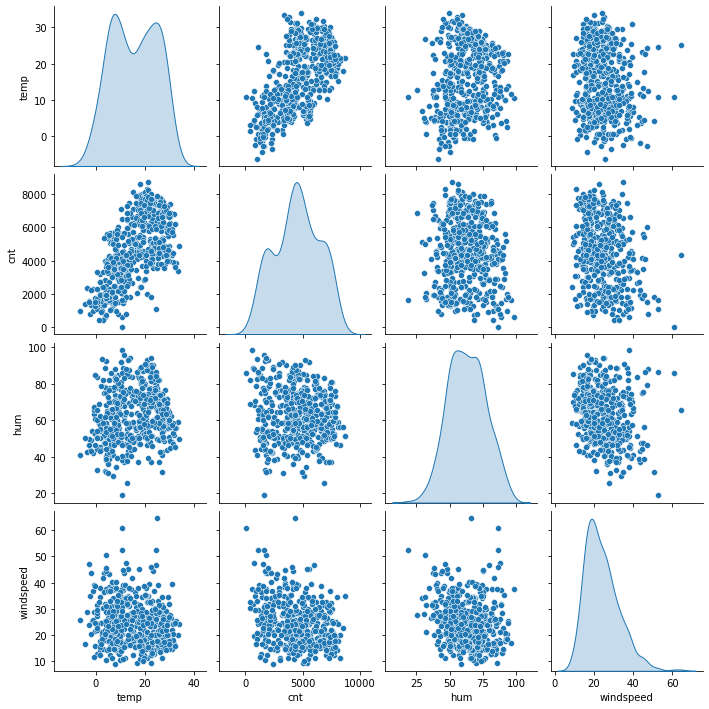

In [74]:
x=train[["temp", "cnt", "hum", "windspeed"]]
sns.pairplot(x, diag_kind="kde")

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
sns.boxplot(x="season", y="cnt", data=clean_df)
plt.subplot(2,3,2)
sns.boxplot(x="month", y="cnt", data=clean_df)
plt.subplot(2,3,3)
sns.boxplot(x="weather", y="cnt", data=clean_df)
plt.subplot(2,3,4)
sns.boxplot(x="workingday", y="cnt", data=clean_df)
plt.subplot(2,3,5)
sns.boxplot(x="weekday", y="cnt", data=clean_df)
plt.subplot(2,3,6)
sns.boxplot(x="holiday", y="cnt", data=clean_df)

In [ ]:
plt.figure(figsize=(25,20))
matrix=np.triu(temp.corr())
sns.heatmap(temp.corr(), annot=True, mask=matrix)

In [106]:
a=["temp", "hum", "windspeed", "cnt"]
train[a]=scaler.fit_transform(train[a])

In [109]:
ytrain=train.pop("cnt")
xtrain=train

In [142]:
lm=LinearRegression()
lm.fit(xtrain, ytrain)
rfe=RFE(lm, n_features_to_select=15)
rfe=rfe.fit(xtrain, ytrain)
list(zip(xtrain.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('month_2', False, 13),
 ('month_3', True, 1),
 ('month_4', True, 1),
 ('month_5', True, 1),
 ('month_6', True, 1),
 ('month_7', True, 1),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', True, 1),
 ('month_12', False, 2),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 12),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 8),
 ('workingday_1', False, 5),
 ('holiday_1', False, 15),
 ('weather_good', False, 6),
 ('weather_overcast', False, 14),
 ('weather_rain', False, 10),
 ('weather_snow', False, 3)]

In [143]:
col=xtrain.columns[rfe.support_]
xtrain_rfe=xtrain[col]

In [144]:
vif=pd.DataFrame()
vif["feature"]=xtrain_rfe.columns
vif["vif"]=[variance_inflation_factor(xtrain_rfe.values, i) for i in 
        range(xtrain_rfe.shape[1])]
vif["vif"]=round(vif["vif"],2)
vif=vif.sort_values(by="vif", ascending=False)
vif

,feature,vif
3,month_3,inf
4,month_4,inf
5,month_5,inf
6,month_6,inf
7,month_7,inf
8,month_8,inf
12,season_Spring,inf
13,season_Summer,inf
14,season_Winter,6.66
9,month_9,5.88
